# 5、在 scikit-learn 中使用 PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

使用简单的手写数字数据集。

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

print(X.shape, y.shape)

(1797, 64) (1797,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
X_train.shape

(1347, 64)

In [6]:
len(X_train) / len(X)

0.7495826377295493

In [7]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

CPU times: user 9.97 ms, sys: 6.16 ms, total: 16.1 ms
Wall time: 23.8 ms


In [8]:
knn_clf.score(X_test, y_test)

0.9866666666666667

## 在 scikit-learn 中使用 PCA

把 64 维数据变成了 2 维。

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [11]:
X_train_reduction

array([[  0.20462347,   6.04818131],
       [ -2.08839676,  10.75148372],
       [ 12.46474228, -20.73968098],
       ...,
       [ -9.34672216,   1.16697856],
       [ -2.35612626,  -5.99802579],
       [ -8.90875759,  18.74846861]])

In [12]:
X_test_reduction

array([[ -3.53987894,  12.5584019 ],
       [ -5.22531533,  22.14745291],
       [-18.82237941, -11.61253464],
       [ 28.05423412,   0.56187797],
       [ 12.42635809,  10.65023121],
       [ 13.40717372, -19.74193735],
       [ -1.60079466,  12.63773391],
       [  0.38329733, -25.90914903],
       [ -8.0855176 ,   0.29016717],
       [ 10.74405325, -14.07389391],
       [ 23.47877288,   8.49846758],
       [ 22.15187103,  -2.96939572],
       [  6.21164445,  15.856032  ],
       [ -0.70842301,  12.41456604],
       [-13.53741379,   1.6934541 ],
       [ 11.73680465, -13.74717132],
       [  4.65026102,  25.56912693],
       [ 21.45820005,  -8.40943204],
       [ -8.51537863,  14.43919209],
       [-17.37609282, -13.6688246 ],
       [ -9.69549215, -11.86656614],
       [ 22.09169678, -10.1810677 ],
       [ -2.96160909,   2.7123966 ],
       [-13.06235752,   4.05664511],
       [-14.87549535,  -1.22322436],
       [ 17.18858578,  12.26539805],
       [ 10.19206586, -21.72219871],
 

In [13]:
%%time

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 1.48 ms, sys: 675 µs, total: 2.16 ms
Wall time: 1.46 ms


In [14]:
knn_clf.score(X_test_reduction, y_test)

0.6066666666666667

从 64 维降到 2 维，丢失的信息太多了，因此评分并不高，从结果上来看是合理的。我们应该通过各个主成分表示方差来决定保留多少主成分。

## scikit-learn 降维模块给我们带来的其它的功能

### 主成分分析所解释的方差

In [15]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [16]:
pca.explained_variance_

array([175.90066519, 165.86177754])

In [19]:
from sklearn.decomposition import PCA

# 假设我们不降维，原来的特征矩阵有多少维度，就做多少主成分
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

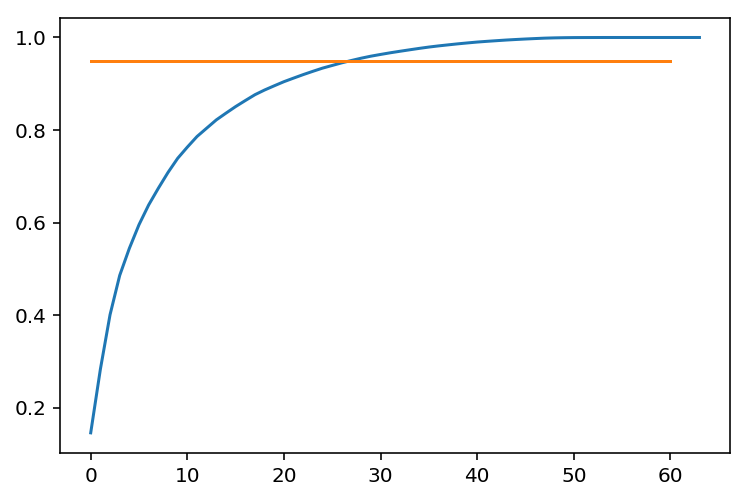

In [20]:
plt.plot([i for i in range(X_train.shape[1])],
         [np.sum(pca.explained_variance_ratio_[:i + 1]) for i in range(X_train.shape[1])])
plt.plot([0, 60], [0.95, 0.95])
plt.show()

从这张图上，我们画了一条平行于 $x$ 轴的直线，它与曲线的交点的 $x$ 的坐标，则表示，如果我们想保持 95% 的方差，应该至少保留多少维度。从图上看，大概是 30 左右的维度。

这个功能，scikit-learn 为我们提供好了，我们直接调用 API 就可以实现。

+ 因为传维度这个超参数，其实我们并不知道应该传多少，但是我们很明确的一个指标是，我们期望我们的模型不要损失太多，因此，我们直接传一个期望保留的方差比例给 PCA，它就能自动为我们计算出，应该保留的主成分的维度。

In [21]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca.n_components_

28

28 的确跟我们在图上看到的差不多，就是接近 30 的位置。此时，我们再用这个模型去训练，准确率就会高很多。

In [23]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [24]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 2.11 ms, sys: 604 µs, total: 2.72 ms
Wall time: 2.09 ms


In [25]:
knn_clf.score(X_test_reduction, y_test)

0.98

没有降维之前，评分是 0.9866666666666667，从 64 维降到了 28 维，评分是 0.98，准确率没有降低多少，但是维数降低很多，效率提升了，这是我们使用主成分分析用于降维的目的之一。

主成分带给我们的好处之二就是可以帮助我们进行数据可视化。

### 使用 PCA 对数据进行可视化

In [29]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

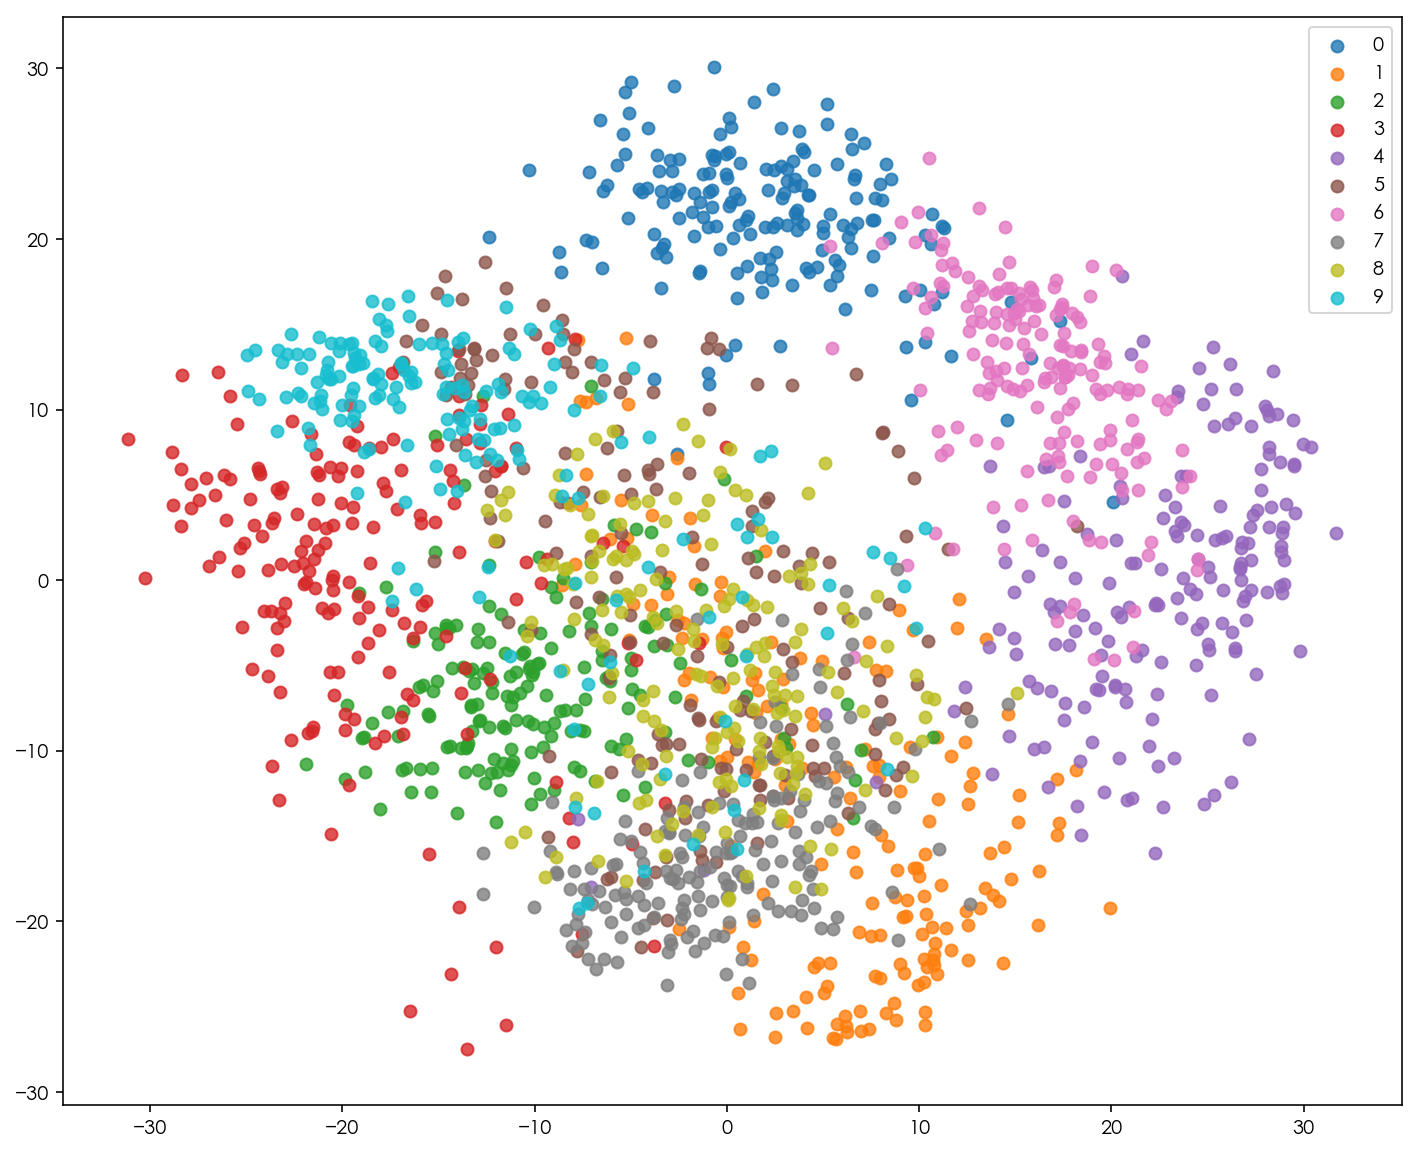

In [36]:
plt.figure(figsize=(12, 10))
for i in range(10):
    plt.scatter(X_reduction[y == i, 0],
                X_reduction[y == i, 1], alpha=0.8, label=str(i))
plt.legend()
plt.show()

保留的两个主成分是最重要的两个主成分，从中可以看到。

+ 0 和 1 分得很开，这是因为 0 和 1 本身就很好区分，一个是圆圈，一个是一条直线
+ 2 和 3 靠得很近，本身 2 和 3 写出来都是曲线，确实不好区分。